# Example on SVD and randomized SVD

For any matrix the best rank-r approximation in terms of spectral and Frobenius norm can be found via the classical singular value decomposition (SVD) as 

$$A = U_r \Sigma_r V_r, A \in \mathbb{R}^{M \times N}, U_r \in \mathbb{R}^{M \times r}, V_r \in \mathbb{R}^{N \times r}, \Sigma_r \in \mathbb{R}^{r \times r},$$
where $U_r$ has orthonormal columns, $V_r$ has orthonormal rows and $\Sigma$ is a diagonal matrix with real non-increasing values at the diagonal known as singular values.

The SVD is basic tool useful for 
1. Black/White image compression
2. Principal-component analysis
3. Solving the linear least squares problem and allow to find the pseudoinverse matrix.

Construction of the full SVD requires $O\left(\min( M \cdot N^2,~  N \cdot M^2) \right)$ operations. Its truncation by rank allows us to find the skeleton decomposition with R separable summands for any matrix:
$$A(i,j) = \sum_{\alpha=1}^R u_{\alpha}(i) \sigma_{\alpha} v_{\alpha}(j).$$
Number of non-zero singular values $\sigma_{\alpha}>0$ is exactly the rank of the studied matrix.

# Idea about randomized SVD

Assume $M < N$ and $R \ll min(M, N)$ and set constant \textit{oversampling} parameter $p$. Randomized SVD can be constructed if one needs to obtain a quasi-optimal rank-R approximation with rank $R \ll M, R << N$. It can be found via the preliminary multiplication of the original matrix by randomly generated matrix $\Omega \in \mathbb{R}^{(R+p) \times M}$ and obtain a skectch matrix $B$ as following
$$B = (A \cdot \Omega) \in \mathbb{R}^{M \times (R+p)}.$$
The cost of such matrix multiplication is $O(M N (R+p))$ operations. As soon as $B$ is a matrix with much less number of columns then its thin-QR (via Gram-Shchmidt orthogonalization process for its columns)  can be computed within $O((R+p)^2 M)$ operations: 
$$B = Q R.$$

After it, one should note that generated matrix consists from orthonormal columns $Q \in \mathbb{R}^{M \times (R+p)}$ is $Q^{\top}Q \approx I_{R+p}$. On the other hand matrix $Q \cdot Q^{\top}$ is a good projection operator (this fact is not easy and requires some theory around Johnson-Lindenstrauss lemma).
After it, we may see 
$$A_{R} = Q (Q^{\top} A) \approx Q U_0 \Sigma_{0} V_0$$
Hence, we reconstruct the approximation of the factors for the truncated SVD for matrix $A$ as rank-R truncation of:
$$U_{R} \approx Q U_0, \Sigma_{R} \approx \Sigma_0, V_{R} \approx V_0 .$$
Additional matrix multiplication $Q^{\top} U_0$ requires another $O(R^2 M)$ operations. All in all, calculation of the truncated SVD with use of random sketch matrices takes $O(MN(R+p) + M(R+p)^2 + N(R+p)^2)$ operations. In case of $R \ll M$, $R \ll N$ is may lead to significant reduction of the computational time.

The theory, which allows one to check the additional error coming from the random structure of the sketch matrix and also coming from the loss of the exactness in the utilized equations is rather hard and we do not include it into our course.

Choice of oversampling parameter could be adjusted via the accuracy estimates for such a version of the quasioptimal approximations (see e.g. the review by Nakatsukasa). In pratcice, it is often set $p=8$.

##### Literature:
1. Tyrtyshnikov, E. E. (1997). A brief introduction to numerical analysis. Springer Science & Business Media.
2. Tyrtyshnikov E. E. (2007) Metody chislennogo analiza, Akademiya (book in Russian)
3. Halko, N., Martinsson, P.-G., Tropp, J. A. (2011). Finding structure with randomness: Probabilistic algorithms for constructing approximate matrix decompositions. SIAM Review, 53(2), 217–288.
4. Nakatsukasa, Y. (2020). Fast and stable randomized low-rank matrix approximation. arXiv preprint arXiv:2009.11392.
5. Nice webpage: https://gregorygundersen.com/blog/2019/01/17/randomized-svd/

In [3]:
import numpy as np
from sklearn.utils.extmath import randomized_svd as rsvd
from matplotlib import pyplot as plt
import time

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
def A(i, j):
    # setup some function-generated matrix
    return 1.0/(i+j+1)

In [5]:
M = 1500 # number of rows
N = 1024 # number of columns
x = np.linspace(1,N,N) # grid for drawings
r = 20 # target rank
Ma = np.zeros([M, N])
# fill the matrix Ma
Ma=np.fromfunction(A, [M, N])
#for i in range(M):
#    for j in range(N):
#        Ma[i,j] = A(i,j)

In [6]:
#%%timeit
# Estimate the time , does not save the data
start = time.time()
U, s, V = np.linalg.svd(Ma)
print("Classical ", time.time() - start, " sec.")

Classical  1.1592128276824951  sec.


In [7]:
# Save the data
U, s, V = np.linalg.svd(Ma)

In [9]:
## Truncation of SVD
Ut = U[:,:r] # m \times r
st = s[:r] # r 
Vt = V[:r,:] # # r \times n
print(np.linalg.norm(Ma - Ut @ np.diag(st) @ Vt))
print(np.linalg.norm(s[r:]))

9.391031627509187e-11
9.391026670253991e-11


In [10]:
#%%timeit
# Estimate the time
start = time.time()
Ur, sr, Vr = rsvd(Ma, n_components=r, random_state=np.random.randint(1))
print("Randomized ", time.time() - start, " sec.")

Randomized  0.13252687454223633  sec.


In [11]:
# Save the data
Ur, sr, Vr = rsvd(Ma, n_components=r, random_state=np.random.randint(1))

Relative error of sigmas =  6.23246356909429e-16
Classical relative approximation error =  3.322658295342276e-11
Randomized straight-forward error =  3.3226606842458726e-11
Initial storage 1536000  memory cells
Compressed storage 50500  memory cells


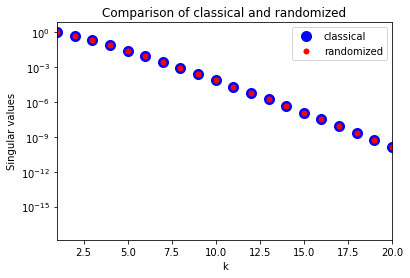

In [12]:
# Check the error for singular values
plt.title("Comparison of classical and randomized")
plt.plot(x, s/s[0], 'bo', markersize=10, label='classical')
plt.plot(x[:r], sr/s[0], 'ro', markersize=5, label='randomized')
plt.ylabel('Singular values')
plt.xlabel('k')
plt.xlim(1,r)
plt.legend()
plt.yscale('log')
print("Relative error of sigmas = ", np.linalg.norm(s[:r] - sr) / np.linalg.norm(s[:r]))
print("Classical relative approximation error = ", np.linalg.norm(s[r:])/np.linalg.norm(s))
print("Randomized straight-forward error = ", np.linalg.norm(Ma - (Ur @ np.diag(sr) @ Vr)) /
                                                                              np.linalg.norm(s))
print("Initial storage", M*N, " memory cells")
print("Compressed storage", (1+M+N)*r, " memory cells")

In [13]:
print("Shapes classical\t", " U", U.shape, " V", V.shape, "\t s", s.shape)
print("Shapes truncated\t", " Ut", Ut.shape, " Vt", Vt.shape, "\t st", st.shape)
print("Shapes randomized\t", " Ur", Ur.shape, " Vr", Vr.shape, "\t sr", sr.shape)

Shapes classical	  U (1500, 1500)  V (1024, 1024) 	 s (1024,)
Shapes truncated	  Ut (1500, 20)  Vt (20, 1024) 	 st (20,)
Shapes randomized	  Ur (1500, 20)  Vr (20, 1024) 	 sr (20,)


# Low rank structure and fact matrix by vector product

Low rank structure of the target matrix $A \in \mathbb{R}^{M \times N}$ allows one to reduce the complexity of the common operation in linear algebra $-$ the calculation of the matrix by vector product $Ax$.

Indeed,
$$A x= U \Sigma V x = U (\Sigma (V x))$$.
Thus, we should follow the steps:
1. $y = Vx, V \in \mathbb{R}^{R \times N}$ -- requires $O(NR)$ operations.
2. $z = \Sigma y$ -- requires $O(R)$ operations because $\Sigma$ is diagonal.
3. $v = U z = Ax,  U \in \mathbb{R}^{N \times R}$  -- requires $O(M\cdot R)$ operations.

All in all, we need $O( (M+N+1)R)$ operations for $Ax$ instead of original $O(M \cdot N)$. If $R \ll M$, $R \ll N$ then it is really a fast operation.

##### Excercises:
1. Implement the rank-truncated SVD following the accuracy parameter $\varepsilon$ truncation in Frobenius norm and in spectral norm.
2. Load any black and white image as numpy array and check its SVD-compression by changing the rank of the truncation.
3. Implement an efficient SVD-based $\varepsilon$-truncation of any low-rank skeleton decomposition for matrix $A = UV$ without reconstruction of the original matrix $A$. 
4. Implement an efficient elementwise sum operation for a low-rank matrix.

In [14]:
vec = np.random.randn(N)

In [15]:
%%timeit 
Ma @ vec

891 µs ± 97.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [16]:
%%timeit 
Ut @ (st * (Vt @ vec))

15.8 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [14]:
y1 = Ma @ vec
y2 = Ut @ (st * (Vt @ vec))
matvec_err = np.linalg.norm(y1 - y2)
rel_matvec_err =  matvec_err/np.linalg.norm(y1)
print("Matvec err= ", matvec_err)
print("Matvec rel err= ", rel_matvec_err)

Matvec err=  1.2074002232163095e-10
Matvec rel err=  4.530827182474217e-11
